In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Data Collection & Processing

In [8]:
# loading the data from csv file to a Pandas DataFrame.
calories = pd.read_csv("calories.csv")
print(calories)

        User_ID  Calories
0      14733363     231.0
1      14861698      66.0
2      11179863      26.0
3      16180408      71.0
4      17771927      35.0
...         ...       ...
14995  15644082      45.0
14996  17212577      23.0
14997  17271188      75.0
14998  18643037      11.0
14999  11751526      98.0

[15000 rows x 2 columns]


In [9]:
# print the first 5 rows of the Dataframe.
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [12]:
exercise_data = pd.read_csv("exercise.csv")
print(exercise_data)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 8 columns]


In [13]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


## Combining the two Dataframes

In [15]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)
print(calories_data)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
0        

In [17]:
# Columns Descritions

# Independent Features (Input Variables):-
#1) User_ID(Numerical(Discrete):- This column represents the unique identification number assigned to each individual.
# It helps distinguish one record from another in the dataset.

#2) Gender(Categorical):- This column indicates whether the individual is Male or Female.
# It may influence calorie burn due to physiological differences.

#3) Age(Numerical(Continuous)):- Represents the age of the individual in years.
# Older individuals may burn calories differently compared to younger individuals.

#4) Height(Numerical(Continuous)):- Indicates the height of the person, usually in centimeters.
# Taller individuals may have different calorie burn patterns.

#5) Weight(Numerical(Continuous)):- Represents body weight, typically measured in kilograms.
# It is one of the most influential predictors of calorie burn.

#6) Duration(Numerical(Continuous)):- Indicates the duration of exercise in minutes.
# Longer exercise sessions usually lead to higher calorie burn.

#7) Heart_Rate(Numerical(Continuous):- Represents the heart rate during exercise (beats per minute).
# Higher heart rate often correlates with higher intensity workouts.

#8) Body_Temp(Numerical(Continuous):- Indicates body temperature during exercise (usually in Celsius).
# Body temperature increases with exercise intensity.

# Dependent Feature(Target Variable):-
# Calories(Numerical(Continuous)):- This column represents the total calories burned during exercise.
# It is the target variable we aim to predict.
# It depends on duration, heart rate, weight, and other factors.



## EDA on this Dataset.

In [18]:
# Get the Quick Overview of the Dataset and Understand the structure of the Dataset.

calories_data.shape  # Rows and Columns of the Dataset.
print("Infornmation about the Dataset")
calories_data.info() # Complete Infornmation about the Columns of the Dataset.
calories_data.columns # Infornmation i.e. Names of the Columns about the Dataset.
calories_data.head(5) # Top 5 Rows of the Dataset.
calories_data.tail(5) # Last 5 Rows of the Dataset.
calories_data.dtypes # Getting Data - Types of each Column in the Dataset.
calories_data.count()  # Count Non-Null Values in Each Column.
calories_data.dtypes # Determining the Data - type of Columns in the Dataset.

Infornmation about the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [19]:
# Checking for the Missing Vaues i.e. find out the Missing Values.

print(calories_data.isnull()) # Null - Values in the form of Boolean Matrix(True - Missing Values , False - Not a mssing Values).
print(calories_data.notnull()) # Opposite of isnull(True - Not a Missing Values , False - Missing Values)
print(calories_data.isnull().sum()) # Count of the Missing Values of each Columns.
# By illustration, it is clear there are no missing values in any column in the Dataset.

       User_ID  Gender    Age  Height  Weight  Duration  Heart_Rate  \
0        False   False  False   False   False     False       False   
1        False   False  False   False   False     False       False   
2        False   False  False   False   False     False       False   
3        False   False  False   False   False     False       False   
4        False   False  False   False   False     False       False   
...        ...     ...    ...     ...     ...       ...         ...   
14995    False   False  False   False   False     False       False   
14996    False   False  False   False   False     False       False   
14997    False   False  False   False   False     False       False   
14998    False   False  False   False   False     False       False   
14999    False   False  False   False   False     False       False   

       Body_Temp  Calories  
0          False     False  
1          False     False  
2          False     False  
3          False     False  
4 

In [23]:
# Handling Duplicates in the Dataset.

print(calories_data.duplicated())  # Reurns a Boolean series i.e. True denotes Duplicate Value and False denotes Not a Duplicate Value.
print(calories_data.duplicated().sum()) # Sum of the Duplicate Values of the rows in the dataset(415 here).


0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool
0


## Univariate Analysis.

## User_ID Column

In [24]:
calories_data['User_ID'].value_counts()

User_ID
14733363    1
10334826    1
12152030    1
11009067    1
17538197    1
           ..
13367422    1
12994105    1
11905609    1
17995892    1
11751526    1
Name: count, Length: 15000, dtype: int64

## Histogram

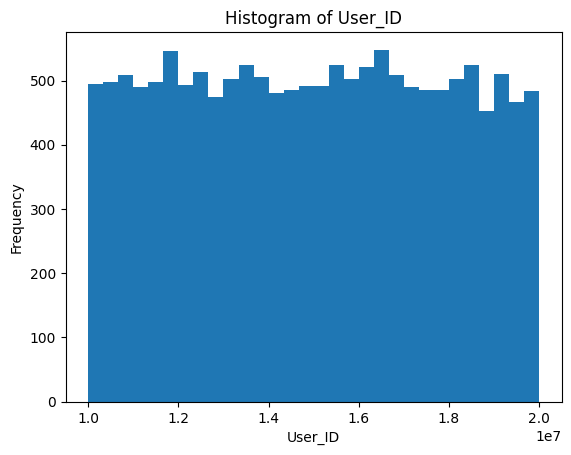

In [26]:
plt.figure()
plt.hist(calories_data['User_ID'], bins=30)
plt.title("Histogram of User_ID")
plt.xlabel("User_ID")
plt.ylabel("Frequency")
plt.show()

## Boxplot

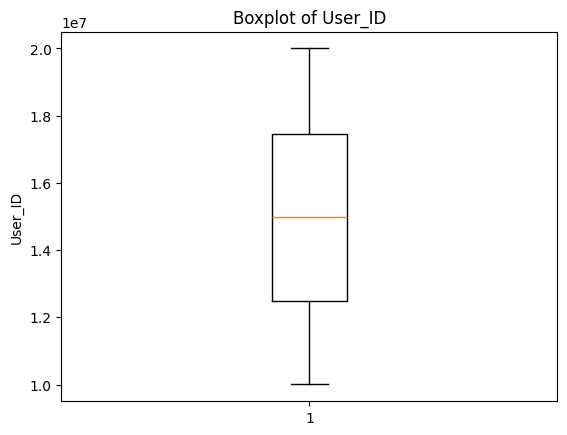

In [27]:
plt.figure()
plt.boxplot(calories_data['User_ID'])
plt.title("Boxplot of User_ID")
plt.ylabel("User_ID")
plt.show()

## Gender Column

In [29]:
calories_data['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

## Countplot

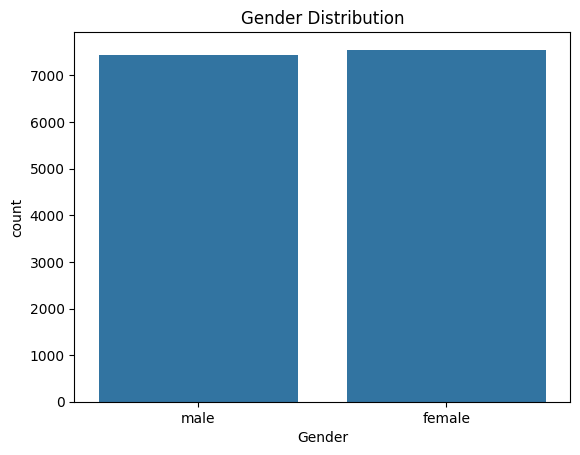

In [31]:
# Countplot(Shows Distribution of male vs female).

sns.countplot(x='Gender', data=calories_data)
plt.title("Gender Distribution")
plt.show()

## Pie Chart

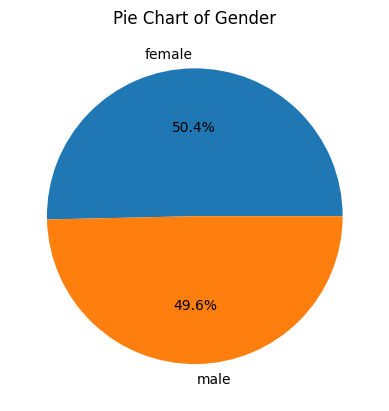

In [32]:
plt.figure()
calories_data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Pie Chart of Gender")
plt.ylabel("")
plt.show()

## Bivariate Analysis

## Age vs Height Columns

## Scatterplot

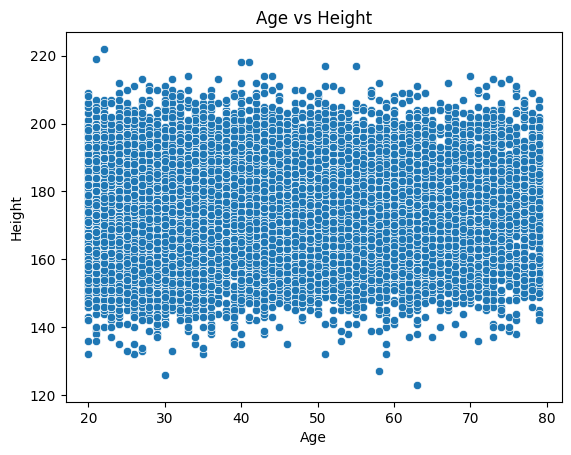

In [34]:
sns.scatterplot(x='Age', y='Height', data = calories_data)
plt.title("Age vs Height")
plt.show()

In [35]:
# Correlation

calories_data[['Age', 'Height']].corr()

,Age,Height
Age,1.000000,0.009554
Height,0.009554,1.000000


## Feature Engineering

## Converting the Text data to Numerical Values

In [36]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_6736\2713499166.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [37]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


## Separating Features and Target.

In [38]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [39]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [40]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


## Splitting the Data into Training Data and Test Data


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


## Model Training(XGBoost Regressor)

In [44]:
# loading the model
model = XGBRegressor()

In [45]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Model Evaluation

## Prediction on Test Data

In [46]:
test_data_prediction = model.predict(X_test)

In [47]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


## Mean Absolute Error

In [48]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [49]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4833678883314132


On Average, our XGBoost Model is making a mistake of about 1.5 calories when predicting calories burned.